In [10]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt


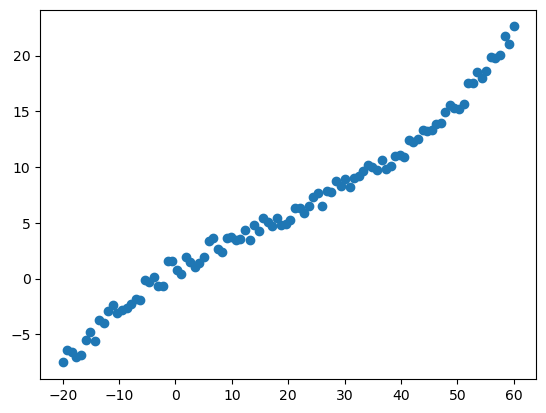

In [11]:
with open('./measurements.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)

x = data[:, 0]
y = data[:, 1]
plt.scatter(x,y)

In [12]:
def h_fun(x, theta_0, theta_1):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: ndarray o wymiarze takim samym jak x, który zawiera wartości f. regresji liniowej dla podanych wag

    '''
    # todo
    y=theta_0 +x*theta_1
    return y
    


In [13]:
def calculate_cost(x, y, theta_0, theta_1):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param y: ndarray z wartościami referencyjnymi o wymiarze takim jak x
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: wartość funkcji kosztu dla podanych paramterów modelu
    '''
    # todo
    cost= (np.sum(h_fun(x,theta_0,theta_1)-y)**2)
    return cost

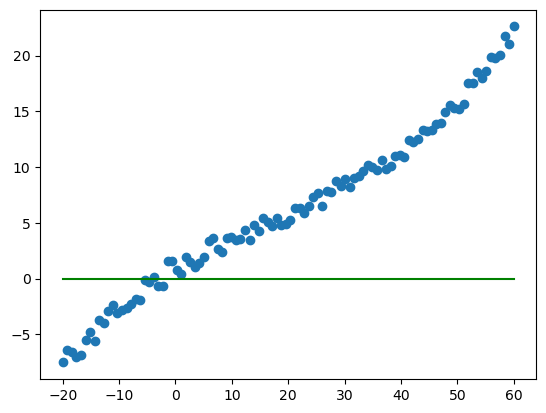

In [14]:
eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.001  # learning rate
theta_0 = 0  # - wartości początkowe parametrów modelu
theta_1 = 0
x = data[:, 0]
y = data[:, 1]
cost= calculate_cost(x,y,theta_0,theta_1)
y2=h_fun(x,theta_0,theta_1)
plt.plot(x,y2,color='green')
plt.scatter(x,y)


In [15]:
def gradient_descent(x, y, theta_0, theta_1, alpha, eps, max_iter=10000):
    m = len(y)
    previous_cost = calculate_cost(x, y, theta_0, theta_1)

    for _ in range(max_iter):
        # Obliczanie gradientów
        predictions = h_fun(x,theta_0,theta_1 )
        gradient_theta_0 = (1 / m) * np.sum(predictions - y)
        gradient_theta_1 = (1 / m) * np.sum((predictions - y) * x)

        # Aktualizacja wag
        theta_0 -= alpha * gradient_theta_0
        theta_1 -= alpha * gradient_theta_1

        # Obliczanie nowej wartości funkcji kosztu
        current_cost = calculate_cost(x, y, theta_0, theta_1)

        # Sprawdzenie warunku stopu
        if abs(previous_cost - current_cost) < eps:
            break
        
        previous_cost = current_cost  # Aktualizacja poprzedniego kosztu

    return theta_0, theta_1

Theta 0: -0.07526786270141611 Theta 1 0.31712012725829986


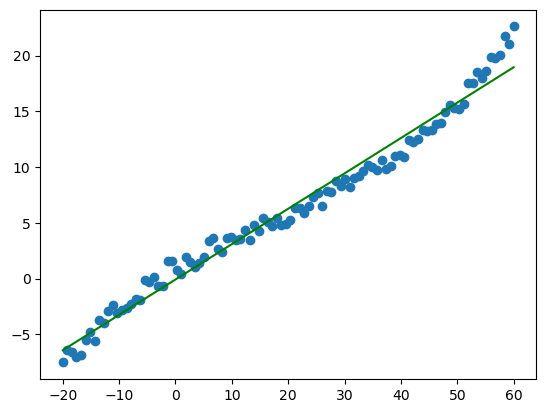

In [16]:
eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.001  # learning rate
theta_0 = 0  # - wartości początkowe parametrów modelu
theta_1 = 0
the0,the1=gradient_descent(x,y,theta_0,theta_1,alpha,eps)
y2=h_fun(x,the0,the1)
plt.plot(x,y2,color='green')
plt.scatter(x,y)
print("Theta 0:", the0, "Theta 1", the1)



In [ ]:
def h_fun(X, theta):
    return theta.T @ X  

def calculate_cost(X, y, theta):
    m = y.shape[1]
    h = h_fun(X, theta)
    cost = (1 / (2 * m)) * np.sum((h - y) ** 2)  
    return cost

def gradient_descent(X, y, theta, alpha, eps, max_iter=10000):
    m = y.shape[1]
    previous_cost = calculate_cost(X, y, theta)

    for _ in range(max_iter):
        h_y_diff = (h_fun(X, theta) - y)
        gradient = (h_y_diff @ X.T) / m
        theta -= alpha * gradient.T  

        current_cost = calculate_cost(X, y, theta)
        if abs(previous_cost - current_cost) < eps:
            break
        
        previous_cost = current_cost

    return theta

with open('./housing.txt', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data2 = [row for row in csvreader]
    data2 = np.array(data2, dtype=np.float32)

y = data2[:, 2]
y.shape = [1, y.shape[0]]
X = data2[:, 0:2]
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1).T  

y_scale = y.max()
y = y / y_scale

X_scale = X.max(axis=1)
X_scale.shape = [-1, 1]
X = X / X_scale

theta = np.zeros((X.shape[0], 1))

alpha = 0.01
eps = 1e-6

theta = gradient_descent(X, y, theta, alpha, eps)


example = np.array([[1], [1300], [4]])
h_example = theta.T @ (example / X_scale) * y_scale
print(f'Koszt nieruchomości o pow. {example[1][0]} z l. pok. {example[2][0]} oszacowany na {h_example[0][0]}')


Koszt nieruchomości o pow. 1300 z l. pok. 4 oszacowany na 319226.3621566548


Wytrenowane theta (scaled):
 [[0.02686292]
 [0.43908797]
 [0.25019451]
 [0.23629867]]
Wytrenowane theta (original):
 [[6.07320478e-01]
 [1.65449307e-01]
 [1.57123064e-03]
 [2.47327379e-05]]


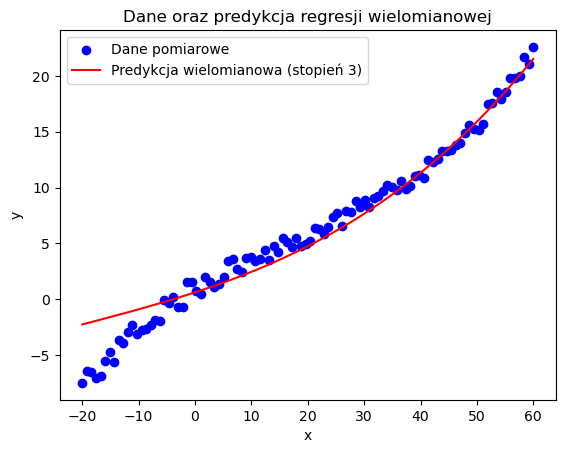

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import csv

def h_fun(X, theta):
    return theta.T @ X

def calculate_cost(X, y, theta):
    m = y.shape[1]
    h = h_fun(X, theta)
    cost = (1 / (2 * m)) * np.sum((h - y) ** 2)
    return cost

def gradient_descent(X, y, theta, alpha, eps, max_iter=10000):
    m = y.shape[1]
    previous_cost = calculate_cost(X, y, theta)
    for i in range(max_iter):
        h_y_diff = h_fun(X, theta) - y
        gradient = (h_y_diff @ X.T) / m
        theta -= alpha * gradient.T
        current_cost = calculate_cost(X, y, theta)
        if abs(previous_cost - current_cost) < eps:
            break
        previous_cost = current_cost
    return theta

# Wczytanie danych z pliku measurements.csv
with open('./measurements.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)

# Przygotowanie danych – zakładamy, że kolumna 0 to x, kolumna 1 to y
x_meas = data[:, 0]
y_meas = data[:, 1]

# Konwersja do macierzy o wymiarach (1, m)
x = x_meas.reshape(1, -1)
y = y_meas.reshape(1, -1)

# Budujemy macierz X dla wielomianu trzeciego stopnia: [1, x, x^2, x^3]
X = np.vstack([np.ones(x.shape), x, x**2, x**3])

# Skalowanie danych – każdy wiersz macierzy X dzielimy przez swoją maksymalną wartość
X_scale = X.max(axis=1).reshape(-1, 1)  # np. [1, max(x), max(x^2), max(x^3)]
X_scaled = X / X_scale

# Skalowanie y
y_scale = y.max()
y_scaled = y / y_scale

# Parametry uczenia
eps = 1e-10
alpha = 1e-3

# Inicjalizacja parametrów theta (jako float)
theta_init = np.array([[0.0], [0.0], [0.0], [0.0]])

# Optymalizacja na danych przeskalowanych
theta_scaled = gradient_descent(X_scaled, y_scaled, theta_init, alpha, eps)
print("Wytrenowane theta (scaled):\n", theta_scaled)

# Odwracamy skalowanie parametrów – przekształcamy theta_scaled do oryginalnej skali
theta_orig = np.zeros_like(theta_scaled)
theta_orig[0] = y_scale * theta_scaled[0]
theta_orig[1] = (y_scale * theta_scaled[1]) / X_scale[1]
theta_orig[2] = (y_scale * theta_scaled[2]) / X_scale[2]
theta_orig[3] = (y_scale * theta_scaled[3]) / X_scale[3]
print("Wytrenowane theta (original):\n", theta_orig)

# Przygotowanie predykcji – generujemy ciąg punktów x do wykresu
x_pred = np.linspace(x_meas.min(), x_meas.max(), 100)
# Obliczamy wartości wielomianu na podstawie theta_orig
y_pred = theta_orig[0] + theta_orig[1]*x_pred + theta_orig[2]*x_pred**2 + theta_orig[3]*x_pred**3

# Wizualizacja danych pomiarowych i dopasowanej krzywej
plt.scatter(x_meas, y_meas, color='blue', label='Dane pomiarowe')
plt.plot(x_pred, y_pred, color='red', label='Predykcja wielomianowa (stopień 3)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dane oraz predykcja regresji wielomianowej')
plt.legend()
plt.show()
